# DJEZZY Data Analyst Project 

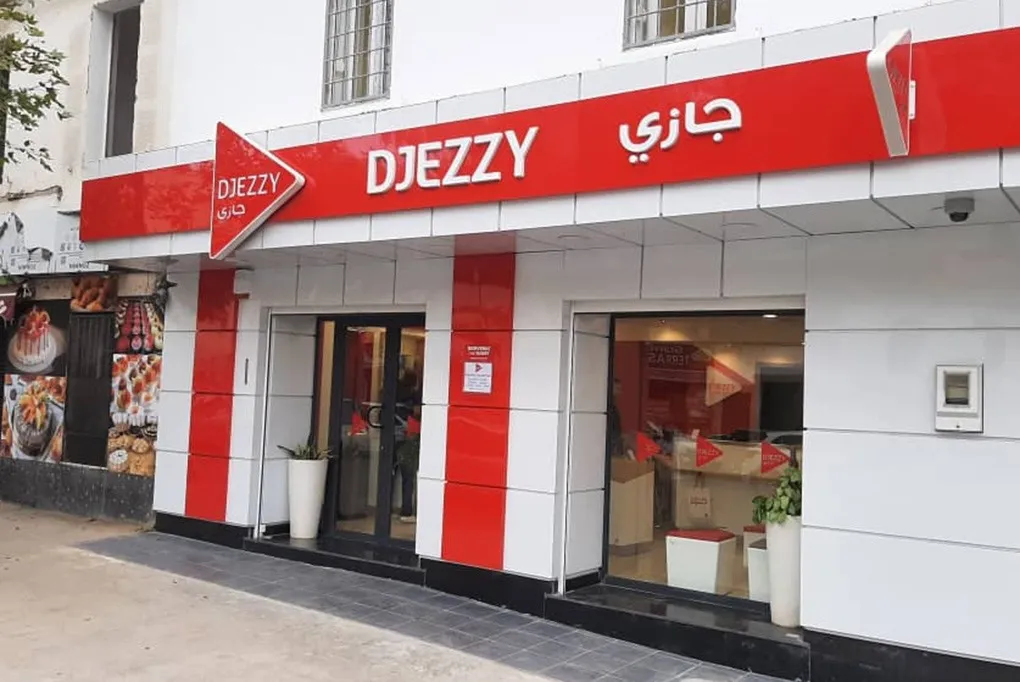!

## Project Overview: Djezzy Social Media and Product Analysis

This project analyzes Djezzy's social media engagement and customer feedback to understand product perception and platform performance. After cleaning and encoding the dataset, the analysis showed that most customers view Djezzy's products as either bad or okay. Instagram emerged as the most popular platform, especially among younger users, with higher engagement than Facebook. Comments and likes increase when new products are launched but tend to decline as negative feedback grows.

To address these findings, it's recommended that Djezzy improve product quality, focus marketing on Instagram, provide better support during product launches, and engage more with users on social media. These steps can help boost customer satisfaction and enhance Djezzy's online presence.



#  **1. importing libraries**

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


#  **2.Cleaning Data**

In [2]:
#importing dataset
df=pd.read_csv('/kaggle/input/algerian-dialect-review-for-sentiment-analysis/Algerian Review.csv')
df.head()

,name,date,likes,comment,sentiment,source
0,djezzy.dz,04/03/20 10:29:29,2309,استفيدوا من عروض جازي عايلة الجديدة لي توالم ك...,0,insta
1,amira_la_bonoise,04/03/20 10:31:18,0,Conx ta3koum dayra ki lhaaaam w say,-1,insta
2,noureddiiiiiine,04/03/20 10:31:38,0,@zaki_medjber_62,0,insta
3,linaragguem,04/03/20 10:32:28,0,ما فهمتش هي sim وحدة يخدمو بها العائلة كاملة,0,insta
4,samo_oussama,04/03/20 10:36:29,0,🙏😉🙏,1,insta


In [3]:
#some viz about tail data
df.tail(5)

,name,date,likes,comment,sentiment,source
5315,alaa_aladin,09/03/19 10:48:28,0,😋😋😋,1,insta
5316,dima.dima.dz,10/03/19 18:29:27,0,Djezzy DIMA KAYEN J`DID,1,insta
5317,_aus_____,20/03/19 17:27:04,0,Votre connexion Internet c'est de la merde !!!,-1,insta
5318,rah_imou_off,24/03/19 11:39:55,0,شوف ستوري,0,insta
5319,marita_o.0_,01/04/19 2:55:18,0,C just 24h 😑,-1,insta


In [4]:
#make data desc
df.describe()

,likes,sentiment
count,5320.000000,5320.000000
mean,11.284962,-0.235338
std,242.959368,0.627045
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,15481.000000,1.000000


In [5]:
df.columns

Index(['name', 'date', 'likes', 'comment', 'sentiment', 'source'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       5320 non-null   object
 1   date       5266 non-null   object
 2   likes      5320 non-null   int64 
 3   comment    5320 non-null   object
 4   sentiment  5320 non-null   int64 
 5   source     5320 non-null   object
dtypes: int64(2), object(4)
memory usage: 249.5+ KB


In [7]:
df.dtypes

name         object
date         object
likes         int64
comment      object
sentiment     int64
source       object
dtype: object

In [8]:
#missing values
df.isna().sum()

name          0
date         54
likes         0
comment       0
sentiment     0
source        0
dtype: int64

In [9]:
#duplicates values
df.duplicated().sum()

177

In [10]:
for column in df.columns:
    count_duplicates = df[column].duplicated().sum()
    print(f"Number of duplicates in column '{column}': {count_duplicates}")


Number of duplicates in column 'name': 1972
Number of duplicates in column 'date': 319
Number of duplicates in column 'likes': 5243
Number of duplicates in column 'comment': 573
Number of duplicates in column 'sentiment': 5317
Number of duplicates in column 'source': 5318


In [11]:
#remove duplicated
df = df.drop_duplicates()


In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5143 entries, 0 to 5319
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       5143 non-null   object
 1   date       5089 non-null   object
 2   likes      5143 non-null   int64 
 3   comment    5143 non-null   object
 4   sentiment  5143 non-null   int64 
 5   source     5143 non-null   object
dtypes: int64(2), object(4)
memory usage: 281.3+ KB


In [14]:
df.columns

Index(['name', 'date', 'likes', 'comment', 'sentiment', 'source'], dtype='object')

In [15]:
#convert type of data--> data type and extract month also 

df['date'] = pd.to_datetime(df['date'])
# Extract the month and create a new column for it
df['month'] = df['date'].dt.month
df.info()

/tmp/ipykernel_36/2606181419.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


<class 'pandas.core.frame.DataFrame'>
Index: 5143 entries, 0 to 5319
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       5143 non-null   object        
 1   date       5089 non-null   datetime64[ns]
 2   likes      5143 non-null   int64         
 3   comment    5143 non-null   object        
 4   sentiment  5143 non-null   int64         
 5   source     5143 non-null   object        
 6   month      5089 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 321.4+ KB


In [16]:
#i remarq that month have missing values so must fillna after change type into int
df['month'].isna().sum()

54

In [17]:
df=df.drop_duplicates()

In [18]:
df['month'] = df['month'].fillna(0)
df['month']=df['month'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5143 entries, 0 to 5319
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       5143 non-null   object        
 1   date       5089 non-null   datetime64[ns]
 2   likes      5143 non-null   int64         
 3   comment    5143 non-null   object        
 4   sentiment  5143 non-null   int64         
 5   source     5143 non-null   object        
 6   month      5143 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 321.4+ KB



#  **3.EDA & Data analyst**

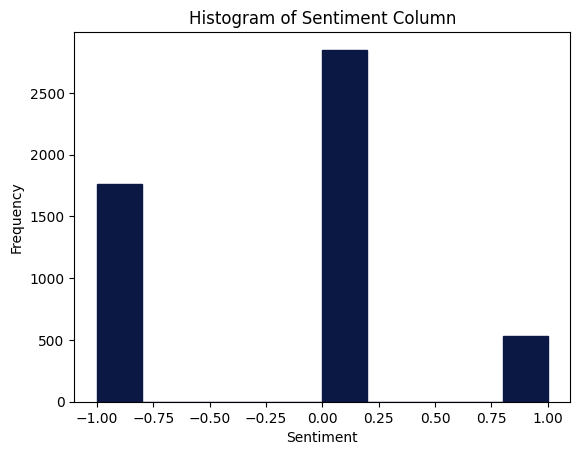

In [53]:
#sentiment is cat already encoding
df['sentiment'].plot(kind='hist', bins=10, edgecolor='#0C1844',color='#0C1844')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Column')
plt.show()

**Product Reviews:**

* 1:This product is amazing! 
* 0:The product is okay,
* -1:very disappointed with this product.


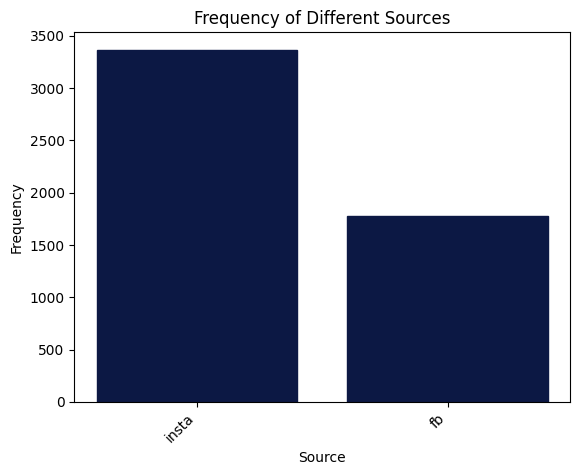

In [52]:
source_counts = df['source'].value_counts()
plt.bar(source_counts.index, source_counts.values, edgecolor='#0C1844',color='#0C1844')

plt.xlabel('Source')
plt.ylabel('Frequency')
plt.title('Frequency of Different Sources')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
#encoding  sources obj for more flexibility:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['source_encoded'] = label_encoder.fit_transform(df['source'])
print(df[['source', 'source_encoded']].head())


  source  source_encoded
0  insta               1
1  insta               1
2  insta               1
3  insta               1
4  insta               1


In [22]:
df.sample(20)

,name,date,likes,comment,sentiment,source,month,source_encoded
3159,Amer Ben Ali,2020-12-08 17:12:41,4,كونكسيو ديالكم هي ولات تحلل فيا تقولي ما تفورص...,0,fb,12,0
4184,perle7315,2020-06-15 20:03:02,0,Enfin dertou haja mlihaaaaaa ❤️❤️❤️,1,insta,6,1
3385,Zack Arc,2020-07-22 08:17:55,0,شوفولنا حل للصور في الماسنجر، طولتو بزاف,0,fb,7,0
1387,mah_mourad,2019-07-15 05:59:07,0,بصح خدعتون في تاع 1000دج علاه زدتوا فيها 200دج,0,insta,7,1
1379,othmane1981,2019-05-07 11:01:17,0,يجب تعديل عرض سبيسيال خاصة الدفع البعدي بعد هذ...,0,insta,5,1
3874,_imene_black__,2020-05-07 11:05:07,1,@cserinl mam ana😢😢😢 wsh n9olkum Djezzy merci b...,1,insta,5,1
914,yahlali.abdel,2019-12-19 19:55:27,1,Rodolna ta3 1000 da ya les voleurs,0,insta,12,1
1844,mnwerlamine,2020-08-08 13:36:28,0,Nik ya matkom cnx ki zbiii na3 din babakoum,-1,insta,8,1
4496,angel._.dax,2020-11-05 21:37:22,1,Haya ya zh mazal madartohch😒😒,-1,insta,11,1
3755,Kada Ain Salah,NaT,1,في تمنراست خدمات جازي موجودة ولكن ولكن الكونيك...,-1,fb,0,0


In [23]:
df.dtypes

name                      object
date              datetime64[ns]
likes                      int64
comment                   object
sentiment                  int64
source                    object
month                      int64
source_encoded             int64
dtype: object

In [58]:
#date with likes:
likes_count = df.groupby('date')['likes'].count().reset_index()
likes_count.columns = ['date', 'likes_count']
fig = px.line(likes_count, x='date', y='likes_count', title='Count of Likes Over Time',
              color_discrete_sequence=['#0C1844'])
fig.show()


In [50]:
#date with num of comments :
comments_count = df.groupby('date')['comment'].count().reset_index()
comments_count.columns = ['date', 'comments_count']
fig = px.line(comments_count, x='date', y='comments_count', title='Count of Comments Over Time',
              color_discrete_sequence=['#0C1844'])
fig.show()



In [56]:
#coment with source_encode:
#insta=1
#fcb=0
comments_encoded_count = df.groupby('source_encoded')['comment'].count().reset_index()
comments_encoded_count.columns = ['source_encoded', 'comments_count']

fig = px.bar(comments_encoded_count, x='source_encoded', y='comments_count', title='Count of Comments by Source Encoding',
             color_discrete_sequence=['#0C1844'])
fig.show()



In [51]:
#like with source_encode:
#insta:1
#facebook:0
likes_encoded_count = df.groupby('source_encoded')['likes'].count().reset_index()
likes_encoded_count.columns = ['source_encoded', 'likes_count']
fig = px.bar(likes_encoded_count, x='source_encoded', y='likes_count', title='Count of Likes by Source Encoding',
             color_discrete_sequence=['#0C1844'])
fig.show()


### **Conclusions:**
- 🛑 **Product Perception:** The majority of customers think the products are either bad or just okay.
- 📱 **Platform Popularity:** Instagram is more popular than Facebook for viewing and interacting with Djezzy products.
- 📈 **Comment Trends:** Comments increase significantly when Djezzy introduces new products, especially after customers start testing them and find them unsatisfactory.
- 👍 **Likes Behavior:** The pattern with likes is similar to comments—people like posts when new products are introduced, but negative experiences lead to a decrease in likes over time.
- 🎯 **Target Audience:** Instagram has higher interaction (likes and comments) because Djezzy's users are mostly students and young people who prefer Instagram over Facebook.

### **Recommendations:**
- 🔄 **Product Improvement:** Focus on improving product quality to convert the "bad" and "okay" perceptions into positive feedback.
- 📊 **Targeted Marketing:** Increase engagement on Instagram by tailoring content to students and young users, who are more active on this platform.
- 🚀 **Product Launch Strategy:** When launching new products, consider providing better information, trials, or demos to ensure users have a positive experience from the start.
- 💬 **Engage with Feedback:** Actively respond to comments on Instagram, especially when new products are launched, to address concerns and build trust.
- 📅 **Consistent Posting:** Maintain a consistent and engaging posting schedule on Instagram to keep the young audience engaged and informed.
